<a href="https://colab.research.google.com/github/Necromant24/saves/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install qiskit-aer
!pip install tweedledum

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


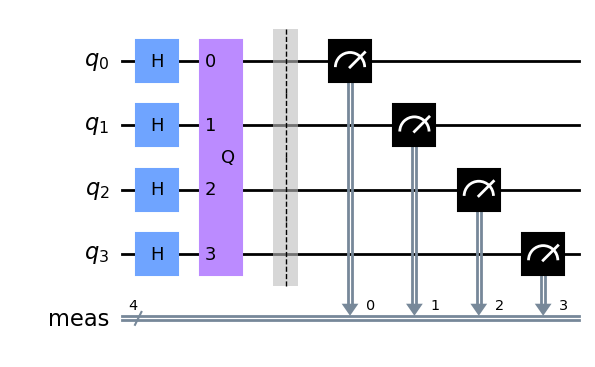

In [ ]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('drive/MyDrive/Colab Notebooks/task.txt')
oracle.draw('mpl')
# Формирование схемы алгоритма
from qiskit import QuantumCircuit
init = QuantumCircuit(4)
# Инициализация равновесной суперпозиции
init.h([0,1,2,3])
# Шаги 2 и 3 алгоритма
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw('mpl')


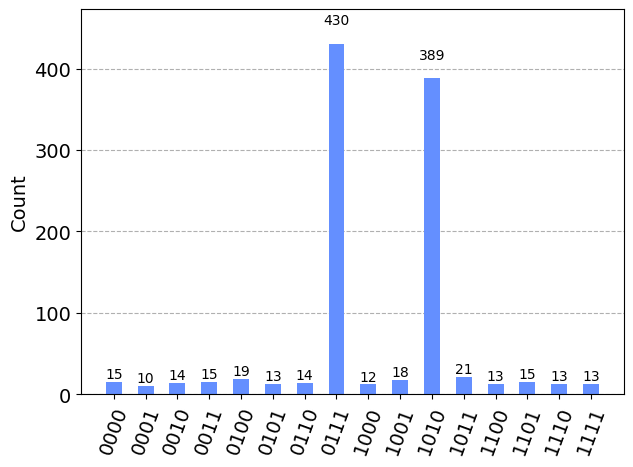

In [ ]:
# Симуляция схемы
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()
# Вывод результатов
from qiskit.visualization import plot_histogram
plot_histogram(counts)